In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#%cd drive/MyDrive/Github/master_thesis
%cd drive/MyDrive/GitHub/master-thesis

/content/drive/MyDrive/GitHub/master-thesis


In [4]:
from clustering.utils import *

In [5]:
beh_cols = get_behaviour_cols()
df_pca_input = get_preprocessed_data(impute=True, impute_cols=beh_cols)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pca_input = scaler.fit_transform(df_pca_input[beh_cols].to_numpy())
pca_input.shape

(123230, 23)

In [7]:
pca = PCA()
x_pca = pca.fit_transform(pca_input)
df_pca = pd.DataFrame(x_pca)
for column in df_pca.columns:
  df_pca.rename(columns={column: 'PC_'+str(column)}, inplace=True)
df_pca.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22
0,-0.434335,-0.223732,-0.240509,-0.258341,0.351749,0.006769,0.107871,-0.273086,-0.062490,0.222961,...,-0.265460,-0.014869,0.029733,0.124997,-0.047784,-0.038103,-0.042267,0.011987,0.006619,0.079820
1,-0.736331,-0.132329,-0.179533,-0.314854,0.071059,-0.346478,-0.465221,0.246890,0.043862,0.076761,...,0.026120,-0.145648,-0.007360,0.105513,0.036527,0.010652,0.087560,0.147484,-0.076578,0.047202
2,-0.754406,0.152623,0.148076,0.532508,-0.337626,-0.078483,-0.223338,0.072501,0.408530,0.042416,...,-0.046759,-0.135497,0.043068,0.027590,0.269606,-0.023366,-0.238308,-0.132815,0.022716,-0.027740
3,-0.610206,0.016363,0.464969,-0.090197,0.537031,0.478387,0.392734,-0.434215,-0.445998,0.096336,...,0.075721,0.069382,-0.024201,0.165832,-0.027591,0.015093,-0.022726,0.072923,0.110761,0.025359
4,0.102406,-0.666096,0.552092,0.699626,0.410284,0.096322,-0.561797,0.326299,0.070234,-0.236242,...,-0.663648,-0.596679,0.207106,-0.532670,0.439936,0.176367,0.066790,-0.529351,0.195440,0.003797


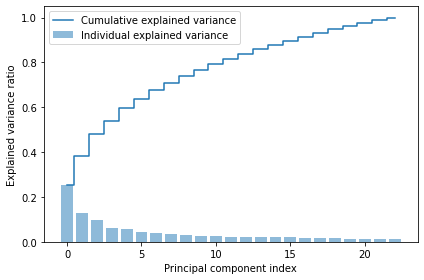

In [8]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()

In [9]:
nr_pc_80 = (cum_sum_eigenvalues<=0.8).sum()
print(nr_pc_80,  ' Werte erklären 80% der Daten.')

11  Werte erklären 80% der Daten.


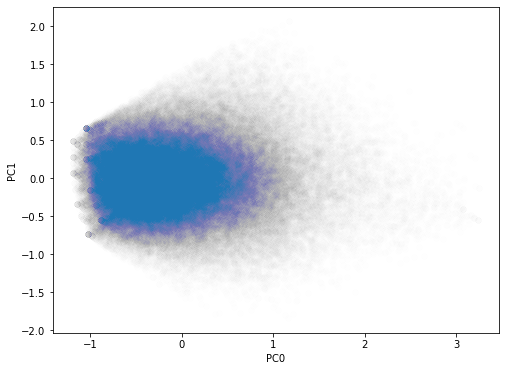

In [10]:
plt.scatter(x=df_pca['PC_0'], y=df_pca['PC_1'], alpha=0.005)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.show()

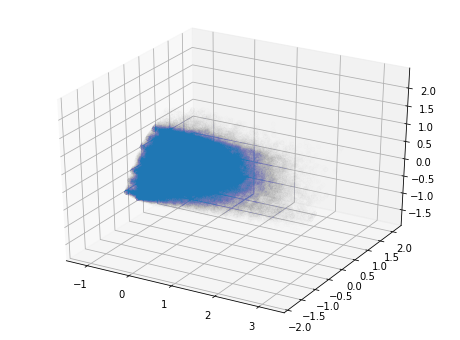

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_pca['PC_0'], df_pca['PC_1'], df_pca['PC_2'], alpha=0.005)

In [12]:
df_pca_write = pd.concat([df_pca.iloc[:,:nr_pc_80].copy(), df_pca_input], axis=1)
df_pca_write.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125254 entries, 0 to 125300
Data columns (total 90 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   PC_0                                           123230 non-null  float64
 1   PC_1                                           123230 non-null  float64
 2   PC_2                                           123230 non-null  float64
 3   PC_3                                           123230 non-null  float64
 4   PC_4                                           123230 non-null  float64
 5   PC_5                                           123230 non-null  float64
 6   PC_6                                           123230 non-null  float64
 7   PC_7                                           123230 non-null  float64
 8   PC_8                                           123230 non-null  float64
 9   PC_9                                 

In [13]:
df_pca_write.to_csv('data/preprocessing/dim_reduction/220407_pca_data.csv', index=False)

# PCA Component Evaluation


In [14]:
df_components = pd.DataFrame(pca.components_, columns=beh_cols).transpose()
df_components.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Q1_2_covid_is_threat,-0.181804,-0.076892,-0.017354,0.249704,0.115245,-0.802603,0.219373,0.342387,0.242688,-0.004455,...,-0.036186,0.015949,-0.008945,-0.010107,-0.011487,-0.000465,0.004612,0.045671,-0.000973,-0.000832
Q2_1_easy_to_follow_advice,-0.201092,0.202012,-0.163216,-0.096194,-0.391188,0.072463,0.078876,0.072182,0.038912,-0.102263,...,0.404409,0.050872,-0.361765,0.122935,-0.053826,-0.057161,-0.021140,-0.014815,0.002549,0.006743
Q2_2_can_follow_advice_if_wanted,-0.162520,0.144284,-0.278012,-0.084975,-0.404068,0.013496,0.102889,0.037028,-0.009972,0.027314,...,-0.427869,-0.255361,0.442470,-0.377320,-0.024063,0.020253,-0.002333,-0.011297,-0.018786,-0.002074
Q2_3_if_follow_advice_safe,-0.216651,0.167746,-0.280116,-0.021804,-0.224000,-0.021345,0.047929,-0.007067,0.046043,0.110084,...,0.263899,0.155417,-0.009065,-0.394936,-0.094439,-0.071538,0.007679,0.005286,-0.010433,-0.001369
Q2_4_if_follow_advice_others_safe,-0.189148,0.145236,-0.291099,-0.005794,-0.297560,-0.081324,0.075156,-0.064055,-0.063339,0.084322,...,-0.214302,0.001752,-0.101449,0.687971,0.187199,0.115339,0.027691,0.120889,-0.018736,0.002149


In [15]:
df_components = df_components.apply(lambda x: np.abs(x))
df_components.nlargest(5, columns=0)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Q3_7_minimize_activities_w_contact,0.300009,0.252189,0.126700,0.181238,0.018957,0.071157,0.001890,0.308082,0.143083,0.018883,...,0.048614,0.002683,0.069579,0.089513,0.147477,0.345290,0.599704,0.109915,0.060953,0.053165
Q3_6_avoid_crowds,0.292018,0.214382,0.139224,0.174249,0.016941,0.058407,0.037344,0.218581,0.094953,0.014029,...,0.155674,0.053847,0.328696,0.256821,0.384059,0.192466,0.431493,0.081070,0.037786,0.004927
Q6_9_trust_political_strategy,0.286044,0.220551,0.141259,0.181656,0.385286,0.047066,0.125608,0.147491,0.004339,0.000067,...,0.218210,0.723326,0.031358,0.032896,0.112876,0.013727,0.009085,0.149861,0.062972,0.015517
Q3_2_avoid_contact,0.280706,0.198735,0.127709,0.170365,0.026552,0.043851,0.077880,0.182422,0.091468,0.030483,...,0.158775,0.050390,0.425638,0.263498,0.332242,0.173594,0.536261,0.056580,0.192669,0.044344
Q6_6_clear_information_on_advice_reason,0.268460,0.188711,0.138495,0.152931,0.332656,0.134198,0.112935,0.080229,0.116328,0.046971,...,0.474693,0.394840,0.030258,0.062752,0.053213,0.036788,0.016048,0.051714,0.009674,0.009779


In [16]:
df_components.nlargest(5, columns=0).index.tolist()

['Q3_7_minimize_activities_w_contact',
 'Q3_6_avoid_crowds',
 'Q6_9_trust_political_strategy',
 'Q3_2_avoid_contact',
 'Q6_6_clear_information_on_advice_reason']

In [17]:
for column in range(5):
  top_cols = df_components.nlargest(5, columns=column).index.tolist()
  print('PC ' + str(column) + ': ' + str(top_cols))

PC 0: ['Q3_7_minimize_activities_w_contact', 'Q3_6_avoid_crowds', 'Q6_9_trust_political_strategy', 'Q3_2_avoid_contact', 'Q6_6_clear_information_on_advice_reason']
PC 1: ['Q6_7_advice_limits_daily_activities', 'Q2_5_follow_advice_relationships_impared', 'Q2_6_follow_advice_life_degraded', 'Q3_7_minimize_activities_w_contact', 'Q6_9_trust_political_strategy']
PC 2: ['Q2_5_follow_advice_relationships_impared', 'Q2_6_follow_advice_life_degraded', 'Q6_7_advice_limits_daily_activities', 'Q2_4_if_follow_advice_others_safe', 'Q2_3_if_follow_advice_safe']
PC 3: ['Q5_5_feel_urge_scold', 'Q1_2_covid_is_threat', 'Q6_3_others_can_avoid_spreading', 'Q6_9_trust_political_strategy', 'Q3_7_minimize_activities_w_contact']
PC 4: ['Q2_2_can_follow_advice_if_wanted', 'Q2_1_easy_to_follow_advice', 'Q6_9_trust_political_strategy', 'Q6_6_clear_information_on_advice_reason', 'Q5_5_feel_urge_scold']


# Reduction based on research model

## Examine correlation # To Do: Check correlation calculation - time series

In [18]:
df = get_preprocessed_data(impute=False)
df.date = pd.to_datetime(df.date)

In [19]:
voting_beh_cols = ['Q15_Social_Democrats', 'Q15_Danish_Social_Liberal_Party','Q15_Conservative_Peoples_Party', 'Q15_Socialist_Peoples_Party','Q15_Danish_Peoples_Party', 'Q15_Red-Green_Alliance',
                   'Q15_Other', 'Q15_Venstre', 'Q16_Social_Democrats', 'Q16_Danish_Social_Liberal_Party', 'Q16_Conservative_Peoples_Party', 'Q16_Socialist_Peoples_Party','Q16_Danish_Peoples_Party',
                   'Q16_Red-Green_Alliance', 'Q16_Other','Q16_Unsure_of_party_choice', 'Q16_Venstre']
non_numerical_cols = ['region', 'date']

In [20]:
interesting_cols = df.columns.to_list()
for col in non_numerical_cols:
  interesting_cols.remove(col)

for col in voting_beh_cols:
  interesting_cols.remove(col)
df[interesting_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125301 entries, 0 to 125300
Data columns (total 60 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   gender                                         125301 non-null  int64  
 1   postnr                                         125301 non-null  int64  
 2   Q1_1_feel_exposed                              117577 non-null  float64
 3   Q1_2_covid_is_threat                           121638 non-null  float64
 4   Q2_1_easy_to_follow_advice                     124783 non-null  float64
 5   Q2_2_can_follow_advice_if_wanted               124378 non-null  float64
 6   Q2_3_if_follow_advice_safe                     123400 non-null  float64
 7   Q2_4_if_follow_advice_others_safe              124479 non-null  float64
 8   Q2_5_follow_advice_relationships_impared       123354 non-null  float64
 9   Q2_6_follow_advice_life_degraded     

In [21]:
int_data_scaled = MinMaxScaler().fit_transform(df[interesting_cols])
df_int_scaled = pd.DataFrame(data=int_data_scaled, columns=interesting_cols)
df_int_scaled.head()

,gender,postnr,Q1_1_feel_exposed,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,Q2_6_follow_advice_life_degraded,...,Q14_ocupation_employee_public,Q14_ocupation_self_employed,Q14_ocupation_student,Q14_ocupation_other,Vaccination_Status,Willingness_Vaccination,Q4_1_nr_contact_nonhouse_family,Q4_2_nr_contact_colleagues,Q4_3_nr_contact_friends,Q4_4_nr_contact_strangers
0,0.0,0.199105,NaN,NaN,0.666667,1.000000,0.500000,1.0,0.500000,0.666667,...,1.0,0.0,0.0,0.0,NaN,NaN,0.000,0.0,0.0,0.00
1,1.0,0.403132,0.333333,1.000000,1.000000,1.000000,0.666667,1.0,0.833333,0.666667,...,1.0,0.0,0.0,0.0,NaN,NaN,0.000,0.0,0.2,0.10
2,1.0,0.715996,0.333333,1.000000,1.000000,1.000000,1.000000,1.0,0.500000,0.333333,...,1.0,0.0,0.0,0.0,0.5,1.0,0.625,0.0,0.0,0.00
3,1.0,0.636465,0.166667,0.166667,0.333333,0.333333,1.000000,1.0,0.000000,0.000000,...,1.0,0.0,0.0,0.0,NaN,NaN,0.000,0.0,0.0,0.00
4,0.0,0.408277,0.833333,0.833333,0.000000,1.000000,0.166667,0.0,1.000000,0.500000,...,0.0,0.0,0.0,0.0,NaN,NaN,0.500,0.1,0.4,0.75


In [22]:
corr = df_int_scaled.corr()

In [23]:
c = corr.abs() # auch nicht absolute Werte hinzufügen
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so

gender                                         gender                                           1.0
Q3_7_minimize_activities_w_contact             Q3_7_minimize_activities_w_contact               1.0
Q6_6_clear_information_on_advice_reason        Q6_6_clear_information_on_advice_reason          1.0
Q6_5_ownership_of_advice                       Q6_5_ownership_of_advice                         1.0
Q6_4_advices_create_fair_burden_dristribution  Q6_4_advices_create_fair_burden_dristribution    1.0
                                                                                               ... 
Q2020NovNy4                                    Q2020NovNy3                                      NaN
                                               Vaccination_Status                               NaN
                                               Willingness_Vaccination                          NaN
Vaccination_Status                             Q2020NovNy4                                      NaN


In [24]:
threshold = 0.5
so_interesting = so[(threshold<so) & (so<1)].reset_index()
cols_to_plot = sorted(so_interesting['level_0'].unique().tolist())
so_interesting = so_interesting[so_interesting.index % 2 != 0]
so_interesting

,level_0,level_1,0
1,Q5_2_others_follow_advice,Q5_1_others_took_distance,0.706514
3,age_num,Q14_ocupation_employee_public,0.701120
5,Q3_7_minimize_activities_w_contact,Q3_6_avoid_crowds,0.676844
7,Q3_2_avoid_contact,Q3_7_minimize_activities_w_contact,0.645321
9,Q3_2_avoid_contact,Q3_5_keep_distance,0.626667
11,Q6_5_ownership_of_advice,Q6_2_advices_important,0.616440
13,Q6_9_trust_political_strategy,Q6_6_clear_information_on_advice_reason,0.604354
15,Q6_9_trust_political_strategy,Q6_2_advices_important,0.603213
17,Q3_2_avoid_contact,Q3_6_avoid_crowds,0.584641
19,Q5_4_yourself_kept_distance,Q3_5_keep_distance,0.583807


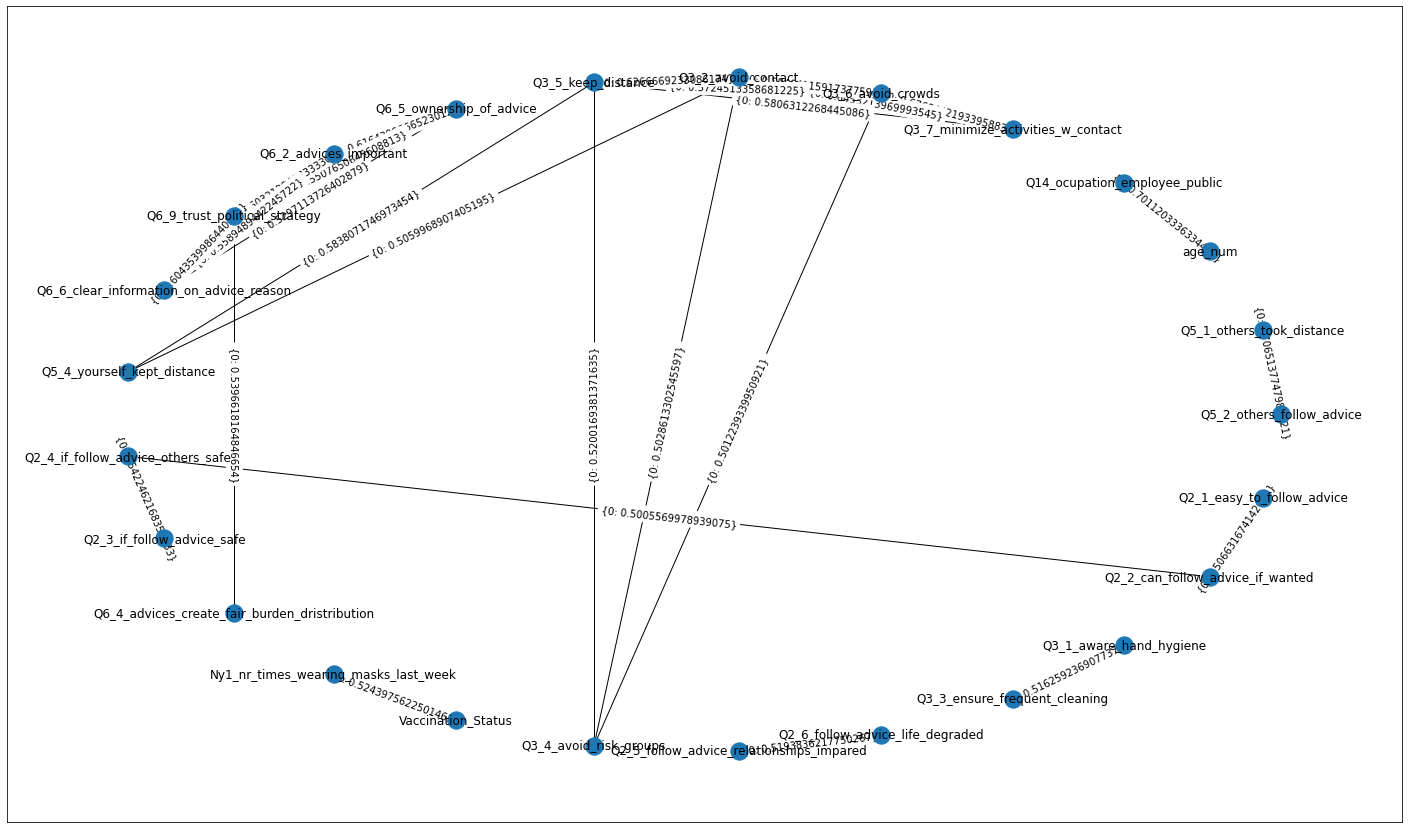

In [25]:
import networkx as nx
G = nx.from_pandas_edgelist(so_interesting, source='level_0', target='level_1', edge_attr=0)
pos = nx.circular_layout(G)
# larger figure size
plt.figure(3,figsize=(25,15)) 
nx.draw_networkx(G,pos)
nx.draw_networkx_edge_labels(G,pos)
plt.show()

# Line Plots # To Do

In [26]:
df_ravg = df.groupby('date').mean().rolling(7).mean().reset_index()
df_ravg.head()

,date,gender,postnr,Q1_1_feel_exposed,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,...,Q16_Red-Green_Alliance,Q16_Other,Q16_Unsure_of_party_choice,Q16_Venstre,Vaccination_Status,Willingness_Vaccination,Q4_1_nr_contact_nonhouse_family,Q4_2_nr_contact_colleagues,Q4_3_nr_contact_friends,Q4_4_nr_contact_strangers
0,2020-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
import plotly.express as px
px.line(df_ravg, x='date', y=interesting_cols) #y=behaviour_cols

# Combine correlated values

In [28]:
dict_combination = get_dict_combination()

In [29]:
for key, value in dict_combination.items():
  df[key] = df[value].mean(axis=1)
df.head()

,gender,postnr,region,Q1_1_feel_exposed,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,...,Q4_4_nr_contact_strangers,group_q2_following_advice,group_q2_consequence_advice,group_q3_cleaning,group_q3_distancing,group_q5_beh_other,group_q6_opinion,group_q7_symptoms,group_q4_contacts,group_household
0,0,2830,Capital,NaN,NaN,5.0,7.0,4.0,7.0,4.0,...,0,5.75,4.5,5.5,6.8,5.0,5.8,0.0,0.00,0.5
1,1,4654,Zealand,3.0,7.0,7.0,7.0,5.0,7.0,6.0,...,2,6.50,5.5,7.0,7.0,2.5,6.5,0.0,1.00,0.5
2,1,7451,Central,3.0,7.0,7.0,7.0,7.0,7.0,4.0,...,0,7.00,3.5,6.0,6.5,5.5,5.8,0.0,1.25,0.5
3,1,6740,Southern,2.0,2.0,3.0,3.0,7.0,7.0,1.0,...,0,5.00,1.0,7.0,7.0,NaN,7.0,0.0,0.00,0.5
4,0,4700,Zealand,6.0,6.0,1.0,7.0,2.0,1.0,7.0,...,15,2.75,5.5,7.0,6.0,3.5,4.6,0.0,6.00,0.5


# Impute missing data

In [30]:
impute_cols = get_behaviour_cols_combined()

In [31]:
for col in impute_cols:
  percent_missing_data = (df[col].isnull().sum() / df.shape[0]) * 100
  print(str(col) + ': ' + str(percent_missing_data) + ' %')

Q1_2_covid_is_threat: 2.9233605478008955 %
Q3b_1_sneeze_sleeve: 5.299239431449071 %
Q5_5_feel_urge_scold: 4.340747480067996 %
Q6_3_others_can_avoid_spreading: 2.308840312527434 %
Q6_7_advice_limits_daily_activities: 0.7414146734662932 %
group_q2_following_advice: 0.05746163238920679 %
group_q2_consequence_advice: 0.4285680082361673 %
group_q3_cleaning: 0.07741358807990359 %
group_q3_distancing: 0.045490458974788706 %
group_q5_beh_other: 5.3559029856106495 %
group_q6_opinion: 0.10933671718501847 %
group_q4_contacts: 0.0 %


In [32]:
thresh_drop = int(len(impute_cols) * 0.9)
df.dropna(thresh=thresh_drop, subset=impute_cols, inplace=True)
for column in impute_cols:
    df[column].fillna(value=df[column].mean(), inplace=True)

In [33]:
df.to_csv('data/preprocessing/dim_reduction/220407_grouped_data.csv', index=False)